<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم داده کاوی</b>
<br>
<b><font size=5> استاد درس: دکتر فاطمه شاکری</b>
<hr>
</div>
</font>

<font face="B Mitra">
<div dir=rtl>
<font size=5>
کتابخانه های موردنیاز را در این بخش بارگذاری کنید.
</p>
</font>
</div>
</font>

In [ ]:
!pip install langdetect
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=fb49da7119fca1131a5f52fd2582fce7b166acf819dfad7d19546ba2239848e1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 600.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 3.6 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578642 sha256=8ed407bfa1da012c43cd0c6187ce660643b44409506371dee616c

<font face="B Mitra">
<div dir=rtl>
<font size=5>
نصب پکیج <code>spacy</code> ممکن است وابسته به سیستم‌عامل و پکیج‌منیجر شما نیاز به دستوری متفاوت داشته‌باشد. دستور مناسب را می‌تواند با استفاده از
<a href="https://spacy.io/usage">این لینک</a> بیابید.
</p>
</font>
</div>
</font>

In [ ]:

import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> لود کردن مجموعه داده </b>
<br>
<p align="justify">
<font size=5>
فایل مجموعه داده در <a href="https://drive.google.com/file/d/15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae/view?usp=sharing">گوگل درایو</a> در اختیار شما قرار گرفته است:
<br>
همچنین در صورت استفاده از گوگل کولب با استفاده از دستور زیر میتوانید مجموعه داده را از گوگل درایو در نوتبوک خود دانلود کنید.
</p>
</font>
</div>
</font>

!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

<font face="B Mitra">
<div dir=rtl>
<font size=5>
در شروع کار،دیتافریم موردنظر خود را ایجاد کردیم و مقادیر خالی را با space جایگزین کردیم.
دلیل این کار جلوگیری از خطا در مصورسازی انتهایی است.<br>
سپس با توجه به زمانبر بودن اجرا،حداقل یک سمپل 1500 تایی نمونه برداری کردیم.
<br>
برای کسب نتایج بهتر و مصورسازی مناسبتر میتوانیم تعداد سمپل را افزایش دهیم.
</p>
</font>
</div>

In [ ]:
!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

Downloading...
From (original): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae
From (redirected): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae&confirm=t&uuid=80c4bedb-375d-479b-b0a9-073172d7cfb4
To: /content/10k_df.csv
100% 341M/341M [00:04<00:00, 79.7MB/s]


In [ ]:
df_10k = pd.read_csv('10k_df.csv')

In [ ]:
df_10k.fillna(value=" ",inplace=True)

In [ ]:
df = df_10k.sample(1500, random_state=42)
del df_10k

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> پیش پردازش متن</b>
<br>
<p align="justify">
<font size=5>
 برای پیش پردازش متون از کتابخانه های مختلفی از جمله NLTK ،Gensim یا Spacy میتوان استفاده کرد.
 <br>
 مواردی که در پیش پردازش متون باید به آن توجه کرد.
 <ol>
 <br>
 <li> <b>تشخیص زبان مورداستفاده مقاله ها:</b>
  در این مجموعه داده میتوانید  با استفاده از کتابخانه langdetect زبان مورد استفاده مقاله را در ویژگی <code>body_text</code> بررسی کنید.
 با توجه به نتیجه نهایی خواهید دید که زبان انگلیسی زبان غالب در این مقاله هاست بنابراین میتوان مقاله های غیر انگلیسی را حذف کرد.
 </li>
 <li> <b>توکنایز کردن (Tokenize) مدل ها:</b>
 در این مجموعه داده از  پایپ لاین  <code>en_core_sci_lg</code> از کتابخانه  spaCy به دلیلی پشتبانی از داده های زیستی و پزشکی و با بردارهای 600 هزار کلمه ای و واژگان بزرگتر میتوانیم استفاده کنیم.<br>
 به دلیل اینکه SpaCy حداکثر یک میلیون کاراکتر را بررسی میکند میتوان با استفاده از max_length این محدودیت را کاهش داد:
 لطفا از parser مشخص شده در بخش زیر برای توکنایز کردن متن خود استفاده کنید.


 </li>
 <li> <b> Lemmatization یا Stemming (ریشه یابی) </b>
 </li>
 <li> <b>حذف Stopwords</b> </li>
 <li> <b>حذف علائم نشانه گذاری</b> </li>
 </ol>
<br>
درمورد هر یک از موارد بالا جستجو کنید و پیش پردازش های لازم را برای ویژگی "body text" مقاله انجام دهید.
</p>
</font>
</div>
</font>

In [9]:
# Initialize the language detector
DetectorFactory.seed = 0

# Initialize the spaCy parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 3000000

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Detect language of each article
tqdm.pandas()
df['language'] = df['body_text'].progress_apply(detect_language)

# Filter out non-English articles
df = df[df['language'] == 'en']

# Function for text preprocessing
def preprocess_text(text, parser, stopwords, punctuations):
    # Tokenize and lemmatize
    doc = parser(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stopwords and token.lemma_ not in punctuations]
    return ' '.join(tokens)

# Define stopwords and punctuations
stopwords = list(STOP_WORDS)
punctuations = string.punctuation

# Apply preprocessing to body_text
df['processed_text'] = df['body_text'].progress_apply(lambda x: preprocess_text(x, parser, stopwords, punctuations))

# Check the results
print(df[['body_text', 'processed_text']].head())

  0%|          | 0/1454 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
100%|██████████| 1454/1454 [23:22<00:00,  1.04it/s]

                                              body_text  \
6252  China is the biggest country in the world that...   
4684  ✉ Correspondence: zlshi@wh.iov.cn Bat, the onl...   
1731  Outbreaks of infectious disease pose unique ch...   
4742  Diarrhoeal diseases of infectious aethiology r...   
4521  The inclusion criteria for asymptomatic adults...   

                                         processed_text  
6252  china biggest country world 1.3 billion popula...  
4684  ✉ correspondence zlshi@wh.iov.cn bat flying ma...  
1731  outbreaks infectious disease pose unique chall...  
4742  diarrhoeal diseases infectious aethiology repr...  
4521  inclusion criteria asymptomatic adults absence...  


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> استخراج ویژگی </b>
<br>
<p align="justify">
<font size=5>
اکنون که متن بدنهٔ مقاله‌ها را از قبل پردازش کرده‌ایم، زمان تبدیل آن‌ها به قالبی است که توسط الگوریتم‌های ما قابل استفاده باشد. برای این منظور از tf-idf استفاده خواهیم کرد. tf_idf  یک الگوریتم بسیار رایج برای تبدیل متن به نمایش معنی دار اعداد است که اهمیت هر کلمه را در متن موردنظر نشان میدهد. <br>
درمورد عملکرد این روش جستجو کنید.
 برای متن پیش پردازش شده هر مقاله، با استفاده از این روش یک بازنمایی برداری با حداکثر 4096 ویژگی ایجاد کنید.
</p>
</font>
</div>
</font>

In [10]:
# Initialize the TF-IDF vectorizer with a max feature limit
tfidf_vectorizer = TfidfVectorizer(max_features=4096)

# Fit the vectorizer on the processed text and transform the text into TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert the resulting matrix to a DataFrame for easier handling and analysis
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Check the resulting TF-IDF DataFrame
print(tfidf_df.head())

    00       000      0001  001        01   02        03   04      05   06  \
0  0.0  0.028805  0.000000  0.0  0.000000  0.0  0.023852  0.0  0.0000  0.0   
1  0.0  0.000000  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0000  0.0   
2  0.0  0.043138  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.0000  0.0   
3  0.0  0.000000  0.000000  0.0  0.008484  0.0  0.000000  0.0  0.0000  0.0   
4  0.0  0.000000  0.072222  0.0  0.000000  0.0  0.000000  0.0  0.0135  0.0   

   ...  zikv  zone  zoonotic   µg   µl   µm        à1   μg        μl   μm  
0  ...   0.0   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  
1  ...   0.0   0.0  0.020318  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  
2  ...   0.0   0.0  0.012919  0.0  0.0  0.0  0.000000  0.0  0.000000  0.0  
3  ...   0.0   0.0  0.011232  0.0  0.0  0.0  0.032127  0.0  0.000000  0.0  
4  ...   0.0   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.021866  0.0  

[5 rows x 4096 columns]


<font face="B Mitra"><div dir=rtl>
<font size=6>
<b> PCA </b>
<br>
<p align="justify">
<font size=5>
با توجه به ابعاد بالای هر بردار ویژگی، با استفاده از روش PCA با حفظ 95 درصد واریانس کاهش بعد دهید.
</p>
</font>
</div>

In [11]:
# Initialize PCA with the goal of preserving 95% of the variance
pca = PCA(n_components=0.95)

# Fit the PCA on the TF-IDF features and transform the features
tfidf_pca = pca.fit_transform(tfidf_df)

# Convert the resulting PCA features to a DataFrame for easier handling and analysis
pca_df = pd.DataFrame(tfidf_pca)

# Check the resulting PCA DataFrame
print(pca_df.head())

# Print the number of components that preserve 95% of the variance
print(f"Number of components to preserve 95% variance: {pca.n_components_}")

        0         1         2         3         4         5         6    \
0  0.112221  0.011887  0.229474 -0.108917  0.142403 -0.073189  0.062027   
1 -0.226555  0.129322  0.180757  0.323229  0.055888  0.080015  0.057477   
2  0.295855 -0.182522  0.167517  0.035402  0.062451  0.001251  0.157285   
3 -0.074373  0.004444  0.070377  0.020325 -0.070098 -0.014210 -0.040022   
4  0.042752 -0.114328  0.025306 -0.031980 -0.159261  0.176995  0.027542   

        7         8         9    ...       940       941       942       943  \
0  0.012646 -0.001384  0.234759  ...  0.006583  0.000383  0.009136 -0.000532   
1  0.017966  0.101880 -0.070225  ... -0.011986 -0.000781 -0.000330  0.008212   
2  0.014615  0.062207  0.187069  ...  0.001753 -0.009497 -0.006563  0.006650   
3 -0.110947 -0.134027 -0.049124  ...  0.002327 -0.005049 -0.013777  0.031561   
4  0.082821 -0.097489 -0.092188  ... -0.008259  0.007358 -0.012721 -0.013356   

        944       945       946       947       948       949  
0  0

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> خوشه بندی </b>
<br>
<p align="justify">
<font size=5>
خوشه بندی مقالات تحقیقاتی مشابه با هم می تواند جستجوی انتشارات مرتبط را ساده کند.  در اینجا از روش K-Means برای خوشه بندی استفاده میکنیم.<br>
 با استفاده از روش Elbow Method  از بین تعداد خوشه های داده شده، میتوانید بهترین تعداد خوشه را بیابید.
<br>
تا 30 خوشه این موضوع را مورد بررسی قرار دهید و پس از یافتن تعداد خوشه مناسب، با استفاده از روش K-Means خوشه بندی لازم را برای بردار ویژگی
بدست آماده از مرحلهٔ قبل به کار بگیرید.
<br><b> بخش امتیازی:</b> میتوانید با به کارگیری روش های دیگر خوشه بندی نظیر خوشه بندی سلسه مراتبی یا DBSCAN نتایج را با استفاده از یک معیار ارزیابی مناسب  مقایسه کنید.
</p>
</font>
</div>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

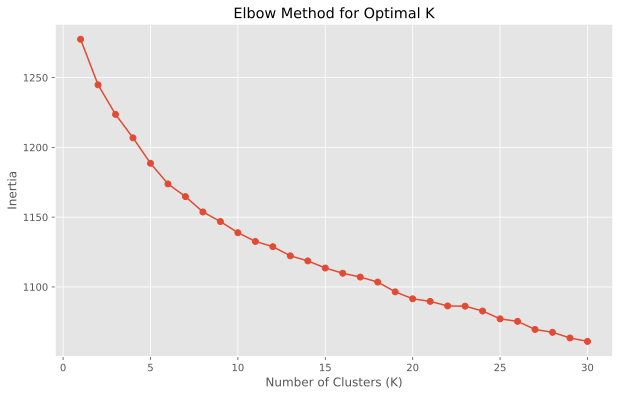

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
3    297
0    264
9    150
1    136
7    133
4    129
2    109
5     93
6     83
8     60
Name: count, dtype: int64


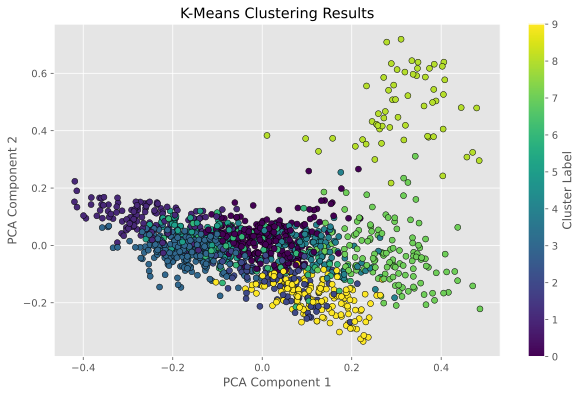

In [12]:
# List to store inertia values for different number of clusters
inertia = []

# Range of K values to test
K_range = range(1, 31)

# Fit KMeans for different K values and store inertia values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the elbow method, we choose the optimal number of clusters (K)
optimal_k = 10

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Check the distribution of clusters
print(df['cluster'].value_counts())

# Visualize the clustering result using a 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<p align="justify">
<font size=5>
<b> بخش امتیازی:</b> خوشه بندی سلسه مراتبی
</p>
</font>
</div>

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Fit Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_clusters = hierarchical.fit_predict(pca_df)

# Add the cluster labels to the original DataFrame
df['hierarchical_cluster'] = hierarchical_clusters

# Compute the Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(pca_df, hierarchical_clusters)

# Compute Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(pca_df, clusters)

# Compare Silhouette Scores
print(f'K-Means Silhouette Score: {silhouette_kmeans:.2f}')
print(f'Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:.2f}')

K-Means Silhouette Score: 0.03
Hierarchical Clustering Silhouette Score: 0.02


<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> t-SNE </b>
<br>
<p align="justify">
<font size=5>
t_SNE یک روش نظارت نشده غیر خطی است که برای اکتشاف و بصری‌سازی داده‌ها مورد استفاده قرار می‌گیرد.
PCA یک روش کاهش ابعاد خطی است که در تلاش برای بیشینه کردن واریانس و حفظ فاصله‌های زیاد دوتایی‌ها از یکدیگر است. این امر می‌تواند منجر به بصری‌سازی ضعیف به ویژه هنگام کار با ساختارهای غیرخطی می‌شود. t-SNE  با حفظ فاصله‌های کم دوتایی‌ها یا شباهت محلی از PCA متمایز می‌شود. به بیان ساده‌تر، t-SNE به کاربر درکی از اینکه داده‌ها چگونه در فضای ابعاد بالا سازمان‌دهی شده‌اند را ارائه می‌کند. <br>
با استفاده از t-SNE می توانیم بردار ویژگی هایی با ابعاد بالا را به 2 بعد کاهش دهیم.
در این مجموعه داده در 2 بعد می توان توزیع مقالات را با استفاده از scatterplot نمایش داد. <br>
برای تفکیک بصری موضوعات مختلف در نمودار بالا، با استفاده از خوشه هایی که در KMeans یافتید ، برای رنگ آمیزی خوشه های مختلف در مصورسازی خود میتوانید استفاده کنید.
</p>
</font>
</div>

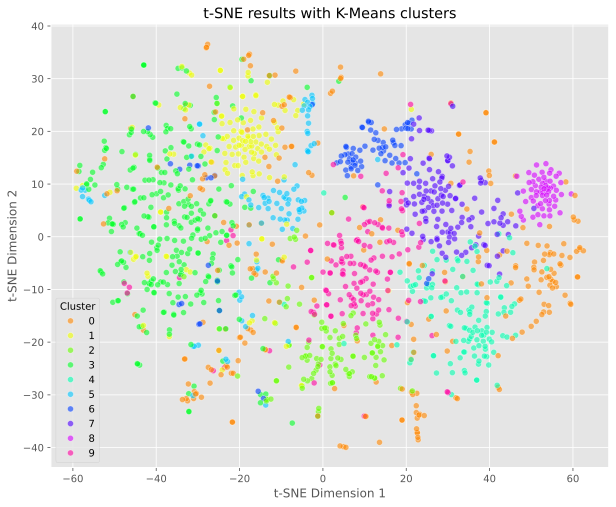

In [20]:
# Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_df)

# Add t-SNE results to the DataFrame
df['tsne_dim1'] = tsne_results[:, 0]
df['tsne_dim2'] = tsne_results[:, 1]

# Plot t-SNE results with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_dim1', y='tsne_dim2',
    hue='cluster',
    palette=sns.color_palette('hsv', optimal_k),
    data=df,
    legend='full',
    alpha=0.6
)
plt.title('t-SNE results with K-Means clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b> مدلسازی موضوعی (Topic Modeling)</b>
<br>
<p align="justify">
<font size=5>
اکنون سعی خواهیم کرد موضوعات کلیدی در هر خوشه را پیدا کنیم.
<br>
 K-means مقالات را خوشه بندی کرد اما موضوعات را برچسب گذاری نکرد. از طریق مدل‌سازی موضوع، متوجه خواهیم شد که مهمترین اصطلاحات برای هر خوشه چیست. این کار با دادن کلمات کلیدی برای شناسایی سریع مضامین خوشه، معنای بیشتری به خوشه می بخشد.<br>
برای مدلسازی موضوعی از الگوریتم های مختلفی نظیر NMF,LSA,LDA میتوان استفاده کرد.
<br>
تعداد موضوعاتی که از خوشه ها قصد دارید استخراج کنید، را به دلخواه انتخاب کنید.
<br>
با استفاده از روش (Latent Dirichlet allocation)LDA موضوعات مناسب را به تعداد موردنظر برای هر خوشه بیابید.
سپس کلمات کلیدی هر موضوع برای خوشه موردنظر را چاپ کنید.
<br><b> بخش امتیازی:</b> مدلسازی موضوعی با روشی غیر از LDA انجام دهید و موضوعات خوشه ها را در هردو روش با هم مقایسه کنید.

</p>
</font>
</div>

In [21]:
# Define a function to extract topics using LDA
def extract_topics_lda(docs, n_topics=5, n_top_words=10):
    # Vectorize the documents
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)

    # Fit LDA model
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Extract topics and print top words
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Extract topics for each cluster
n_topics_per_cluster = 3  # You can adjust the number of topics per cluster
n_top_words = 10  # Number of top words to display per topic

for cluster in range(optimal_k):
    cluster_docs = df[df['cluster'] == cluster]['processed_text']
    print(f"Cluster {cluster}:")

    if not cluster_docs.empty:
        topics = extract_topics_lda(cluster_docs, n_topics=n_topics_per_cluster, n_top_words=n_top_words)
        for i, topic in enumerate(topics):
            print(f"  Topic {i+1}: {', '.join(topic)}")
    else:
        print("  No documents in this cluster.")
    print()

Cluster 0:
  Topic 1: model, data, time, number, disease, infection, risk, population, cases, infected
  Topic 2: air, particles, al, et, 10, concentration, fig, species, wind, room
  Topic 3: al, et, samples, protein, 10, human, fig, detection, based, strains

Cluster 1:
  Topic 1: al, et, infection, species, virus, human, cells, disease, studies, viral
  Topic 2: al, et, cells, cell, immune, infection, response, studies, il, specific
  Topic 3: et, al, virus, rna, viruses, protein, viral, proteins, cells, replication

Cluster 2:
  Topic 1: influenza, virus, viruses, infection, viral, human, infections, vaccine, transmission, respiratory
  Topic 2: children, asthma, infection, respiratory, fever, hrv, age, viral, disease, infections
  Topic 3: respiratory, study, children, patients, rsv, viral, infection, virus, viruses, influenza

Cluster 3:
  Topic 1: cells, cell, mice, ifn, il, immune, expression, infection, response, induced
  Topic 2: cells, virus, protein, viral, cell, fig, 10, 

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<p align="justify">
<font size=5>
<b> بخش امتیازی:</b> مدلسازی موضوعی با NMF

</p>
</font>
</div>

In [22]:
from sklearn.decomposition import NMF

# Define a function to extract topics using NMF
def extract_topics_nmf(docs, n_topics=5, n_top_words=10):
    # Vectorize the documents
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)

    # Fit NMF model
    nmf = NMF(n_components=n_topics, random_state=42)
    nmf.fit(doc_term_matrix)

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Extract topics and print top words
    topics = []
    for topic_idx, topic in enumerate(nmf.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics

# Extract topics for each cluster using NMF
for cluster in range(optimal_k):
    cluster_docs = df[df['cluster'] == cluster]['processed_text']
    print(f"Cluster {cluster}:")

    if not cluster_docs.empty:
        topics = extract_topics_nmf(cluster_docs, n_topics=n_topics_per_cluster, n_top_words=n_top_words)
        for i, topic in enumerate(topics):
            print(f"  Topic {i+1} (NMF): {', '.join(topic)}")
    else:
        print("  No documents in this cluster.")
    print()


Cluster 0:
  Topic 1 (NMF): exposure, risk, regression, model, response, variables, data, models, causal, dose
  Topic 2 (NMF): al, et, time, model, number, based, data, 10, fig, infection
  Topic 3 (NMF): cats, cat, animal, disease, population, health, animals, housing, care, environment

Cluster 1:
  Topic 1 (NMF): et, al, cells, cell, infection, cysteine, studies, viral, virus, protein
  Topic 2 (NMF): al, et, emissions, aircraft, aviation, cirrus, rf, ice, 1999, particles
  Topic 3 (NMF): viruses, rna, virus, et, al, like, viral, plant, replication, host

Cluster 2:
  Topic 1 (NMF): influenza, virus, respiratory, viruses, viral, study, infection, rsv, infections, patients
  Topic 2 (NMF): fever, children, infection, usually, asthma, pneumonia, common, il, high, age
  Topic 3 (NMF): hrv, hrvs, virus, infection, asthma, children, studies, viruses, respiratory, viral

Cluster 3:
  Topic 1 (NMF): cells, cell, ms, mice, il, patients, expression, eae, disease, cns
  Topic 2 (NMF): cells,

<font face="B Mitra">
<div dir=rtl>
<font size=6>
<b>  مصورسازی </b>
<br>
<p align="justify">
<font size=4>
<b>این بخش شامل نمره نیست و صرفا جهت درک شما از مراحل انجام شده است</b><br>
<font size=5>
مراحل قبلی برچسب‌های خوشه‌بندی و مجموعه‌ای از مقالات را به دو بعد کاهش داده است. می‌توانیم یک طرح تعاملی از خوشه ها ایجاد کنیم. <br>
شما میتوانید با انتخاب هر خوشه از اسلایدر، توزیع هر خوشه را به صورت مجزا مشاهده کنید. همچنین میتوانید با بردن نشانگر روی هریک از نقاط مشخصات کلی آن مقاله را مشاهده کنید.
<br>
<img src="https://drive.google.com/uc?id=14xXSuD-FhmSSJBI0oH-a-DDkgjBtqj4_" alt="Linear Algebra Cover Art" width="800">
</p>
</font>
</div>

<font face="B Mitra">
<div dir=rtl>
<p align="justify">
<font size=5>
ورودی تابع زیر، دیتافریم مقالات می‌باشد که می‌بایست شامل ستون‌های زیر باشد:
<br>
1. <code>tsne-2d-one</code>: مولفهٔ اول t-SNE
<br>
2. <code>tsne-2d-two</code>: مولفهٔ دوم t-SNE
<br>
3. <code>y</code>: خوشهٔ هر یک از مقالات
</p>
</font>
</div>

In [29]:
import plotly.graph_objects as go
import plotly.express as px

def interactive_plot(df):
    clusters = sorted(df['y'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['y'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['y'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()